In [1]:
import pandas as pd

def merge_datasets(df):
    df = df.drop('dataset', axis=1)
    merged_df = df.groupby(['model', 'k']).mean().reset_index()
    return merged_df

df = pd.read_csv("baseline_k.csv")
df = merge_datasets(df)
df

,model,k,p_mean,p_std,s_mean,s_std
0,e5-small,4,78.3530,27.1600,85.5710,1.7425
1,e5-small,8,77.4435,24.3620,85.0335,1.6625
2,e5-small,16,76.4505,22.4685,84.4600,1.5990
3,e5-small,32,75.1420,21.3720,83.8555,1.5490
4,e5-small,64,73.7150,20.3935,83.2215,1.5090
5,gte-base,4,75.6950,27.7500,84.0385,1.7665
6,gte-base,8,74.9160,23.8145,83.3010,1.6260
7,gte-base,16,73.8890,21.6490,82.5330,1.5385
8,gte-base,32,72.7800,19.9250,81.7470,1.4805
9,gte-base,64,71.3835,18.9985,80.9415,1.4445


In [2]:
df.dtypes

model      object
k           int64
p_mean    float64
p_std     float64
s_mean    float64
s_std     float64
dtype: object

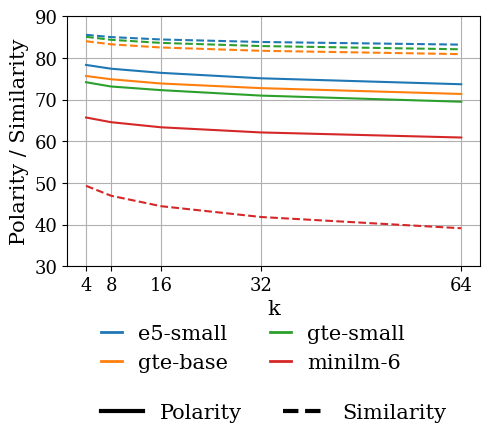

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
import os
import sys
sys.path.append("../")  # for utils
from util import sns_config, matplot_config, tex_config
matplotlib.rcParams.update(matplot_config)

# data sample:
# model	k	p_mean	p_std	s_mean	s_std
# 0	e5-small	4	78.3530	27.1600	85.5710	1.7425
# 1	e5-small	8	77.4435	24.3620	85.0335	1.6625
# 2	e5-small	16	76.4505	22.4685	84.4600	1.599

polarity_df = df[['model', 'k', 'p_mean', 'p_std']]
semantic_df = df[['model', 'k', 's_mean', 's_std']]

# Set up the plot
plt.figure(figsize=(5, 6))


models = df.model.unique().tolist()
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  # Colors for different models
linestyles = {
    "p": "-",
    "s": "--"
}
k_values = df.k.unique().tolist()

for i, model in enumerate(df['model'].unique()):
    subset = df[df['model'] == model]
    plt.plot(subset['k'], subset['p_mean'], label=model, linewidth=1.5, color=colors[i])
    plt.plot(subset['k'], subset['s_mean'], linestyle='--', linewidth=1.5, color=colors[i])

plt.xlabel('k', fontsize=15)
plt.ylabel("Polarity / Similarity", fontsize=15)
# plt.legend()
plt.grid(axis='y')
plt.grid(axis='x')
# set x-axis ticks to k values only
plt.xticks(k_values, fontsize=13)
plt.yticks(range(30, 100, 10), fontsize=13)


# Create legend for models
fontsize = 15
legend1_handles = [mlines.Line2D([], [], color=colors[i], label=models[i], linewidth=2) for i in range(len(models))]
legend1 = plt.legend(handles=legend1_handles, loc='lower center', bbox_to_anchor=(0.45, -0.5), shadow=False, ncol=2, frameon=False, fontsize=fontsize, handlelength=1)
# Create legend for line styles
solid_line = mlines.Line2D([], [], color='black', label='Polarity')
dashed_line = mlines.Line2D([], [], color='black', linestyle='--', label='Similarity')
legend2 = plt.legend(handles=[solid_line, dashed_line], loc='lower center', bbox_to_anchor=(0.5, -0.7), shadow=False, ncols=2, frameon=False, fontsize=fontsize)
plt.gca().add_artist(legend1)
plt.tight_layout()
os.makedirs("figures", exist_ok=True)
plt.savefig("figures/baseline_k.pgf", format="pgf", bbox_inches="tight")
plt.show()